# Convolutional Neural Networks (CNNs)

In deep learning, CNNs are particularly effective for tasks involving image data (2D) and time series data (1D).

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from the input images.



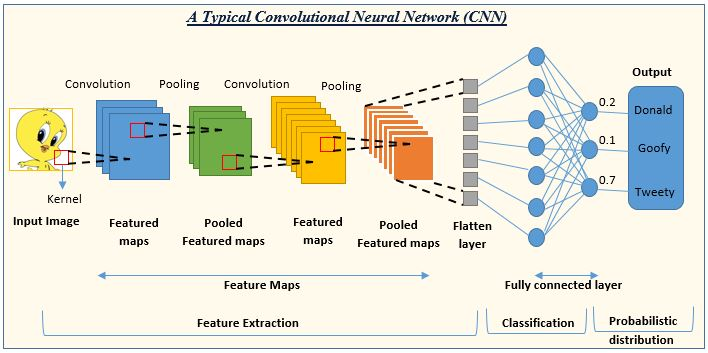

## Key components related to CNNs:


* **Convolutional Layers**: The building blocks of CNNs, convolutional layers apply convolution operations to the input image. These operations involve sliding a small filter (also known as a kernel) over the input image to extract features such as edges, textures, and patterns.

 - Each filter in a convolutional layer learns to detect a specific feature within its receptive field.

* **Pooling Layers**: Pooling layers downsample the feature maps produced by the convolutional layers, reducing their spatial dimensions while retaining the most important information. Max pooling, Global pooling and average pooling are common pooling operations used in CNNs.

* **Activation Functions**: Activation functions introduce non-linearity into the CNN, allowing the model to learn complex relationships between the input and output. Common activation functions include ReLU (Rectified Linear Unit) and tanh.

* **Fully Connected Layers**: Fully connected (or dense) layers connect every neuron in one layer to every neuron in the next layer, enabling the model to perform high-level reasoning and classification based on the learned features.

* **Training with Backpropagation**: CNNs are trained using the backpropagation algorithm, which adjusts the weights/bais of the network to minimize the difference between the predicted output and the ground truth labels.

  - This process involves forward propagation to compute predictions, followed by backward propagation to compute gradients and update the weights using optimization algorithms such as stochastic gradient descent (SGD), Adam, or RMSprop.

* **Pretrained Models and Transfer Learning**: Pretrained CNN models, such as VGGNET, ResNet, and MobileNet, have been trained on large datasets like ImageNet and can be used as feature extractors or fine-tuned for specific tasks with limited data.
  - Transfer learning involves leveraging the learned representations from these pretrained models to improve performance on new tasks.

## CNN Model Implementation

## Importing Dataset:


In this implementation I am using Cat-Dog Data from Kaggle:

https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:53<00:00, 22.1MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Generators


To batch wise upload data to system.

In [ ]:
# Training Data

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Validation Data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.




## Normalize

The images are stored in numpy array format (0-255), to which we need to normalize btw (0-1)

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model

-- To reduce overfitting we will use:

* Dropout
* Batch Normalization


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 122ms/step - loss: 1.0485 - accuracy: 0.5906 - val_loss: 0.6472 - val_accuracy: 0.6108
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5626 - accuracy: 0.7120 - val_loss: 0.5377 - val_accuracy: 0.7260
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4860 - accuracy: 0.7700 - val_loss: 0.5301 - val_accuracy: 0.7558
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4297 - accuracy: 0.8079 - val_loss: 0.4707 - val_accuracy: 0.7836
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3567 - accuracy: 0.8460 - val_loss: 0.4694 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2723 - accuracy: 0.8846 - val_loss: 0.4557 - val_accuracy: 0.7908
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1995 - accuracy: 0.9215 - val_loss: 0.6938 - val_ac

Upon careful analysis, it's noted that while the training accuracy is 97%, the validation accuracy is only 79.56% may indicate overfitting within the system.

Let's plot graphs to validate this observation!

In [ ]:
import matplotlib.pyplot as plt

## Train VS Validation Accuracy


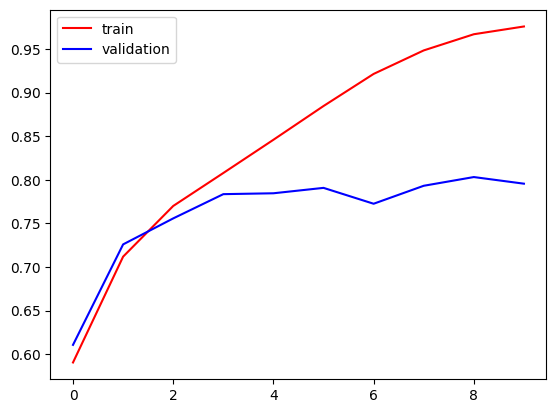

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Train VS Validation Loss


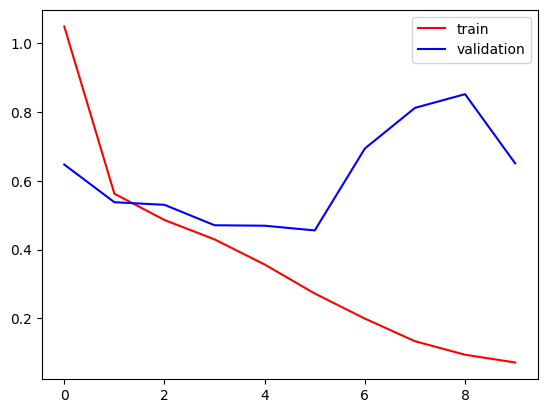

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Let do testing on unseen data!

## Test for Dog!

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

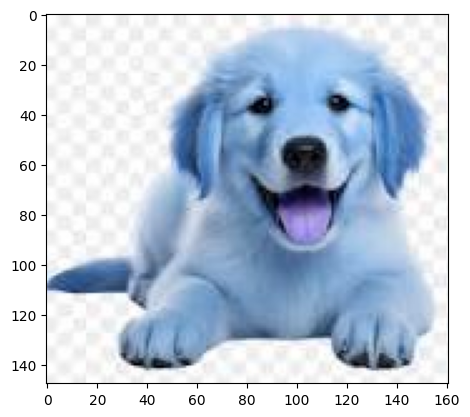

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 161, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 763ms/step


array([[0.]], dtype=float32)

## Test for Cat!

In [ ]:
test_img1 = cv2.imread('/content/cat.jpg')

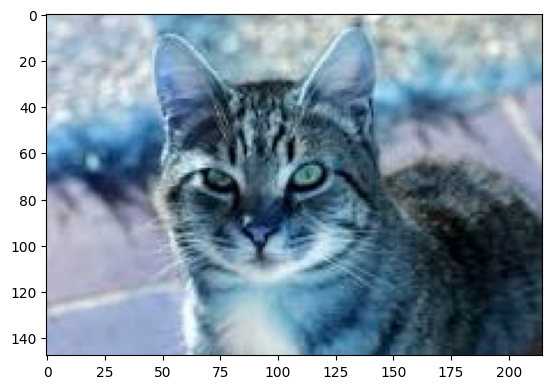

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

Despite exhibiting signs of overfitting, our model demonstrates proficiency in object classification.






> Stay Tuned for **Further Improving this Model**. Don't forget to **Star** this Repo and share with your friends!